In [203]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# 导入数据
data = sns.load_dataset("titanic")
print(data.describe())
data.head()

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


'\n由此可见，\n数量上：一等船票死亡人数最低、三等船票死亡人数最高\n频率上：三等船票持有者死亡率最高；二等船票和一等船票持有者，死亡率与存活率相当\n'

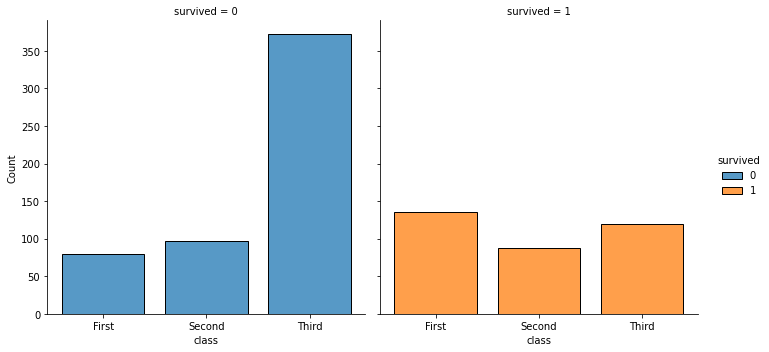

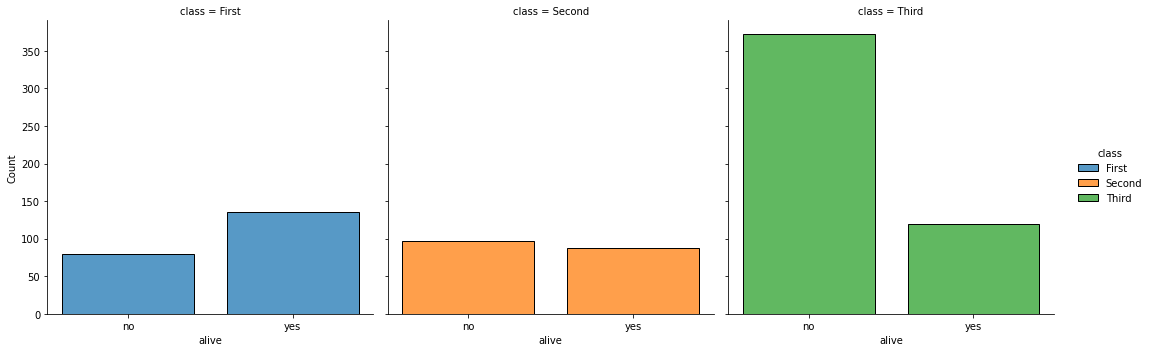

In [110]:

sns.displot(data=data, x="class", hue="survived", multiple="stack", kind="hist", col="survived",shrink=.8)
sns.displot(data=data, x="alive", hue="class", multiple="stack", kind="hist", col="class", shrink=.8)
"""
由此可见，
数量上：一等船票死亡人数最低、三等船票死亡人数最高
频率上：三等船票持有者死亡率最高；二等船票和一等船票持有者，死亡率与存活率相当
"""

'\n由此可见，数量上\n'

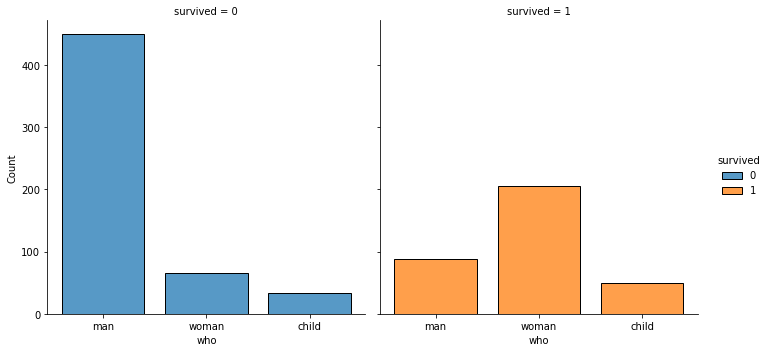

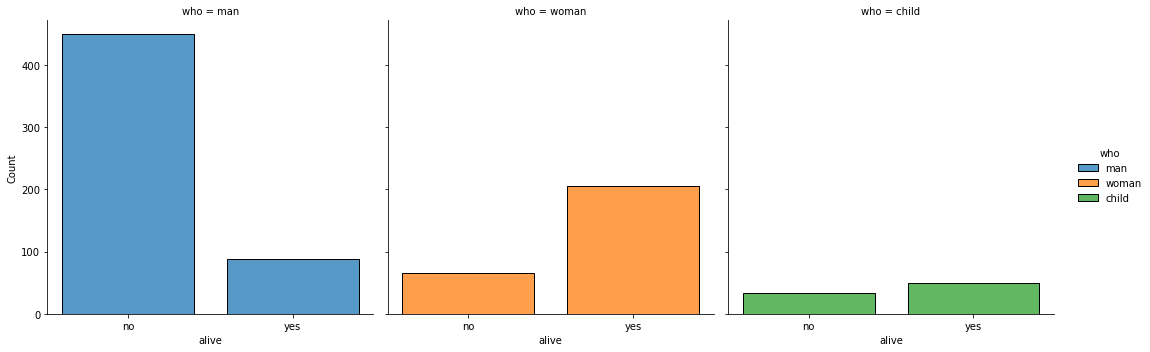

In [109]:
sns.displot(data=data, x="who", hue="survived", col="survived", shrink=.8)
sns.displot(data=data, x="alive", hue="who", col="who", shrink=.8)
"""
由此可见，
数量上男性死亡人数最多，儿童死亡人数最低；女性存活人数最多，儿童存活人数最低
频率上女性存活概率最高，男性存活概率最低
"""

'\n由此，更加证实了上面的结论\n'

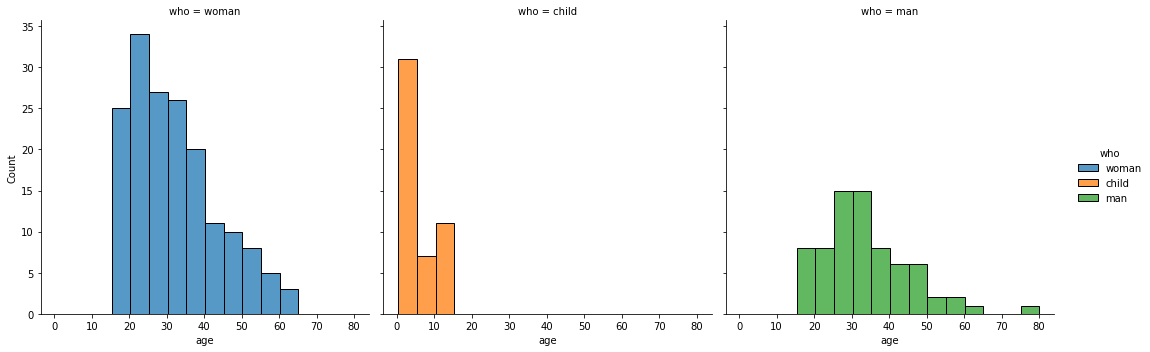

In [130]:
sns.displot(data=data[data["survived"]==1], x="age", hue="who", col="who", kind="hist", multiple="stack")
"""
由此，更加证实了上面的结论
"""

<AxesSubplot:xlabel='age', ylabel='Density'>

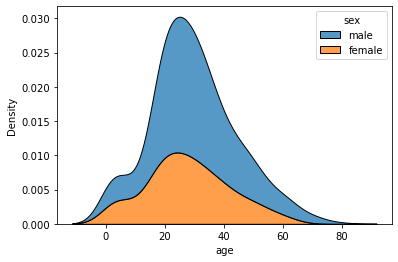

In [134]:
#查看年龄构成
sns.kdeplot(data=data, x="age", multiple="stack", hue="sex")

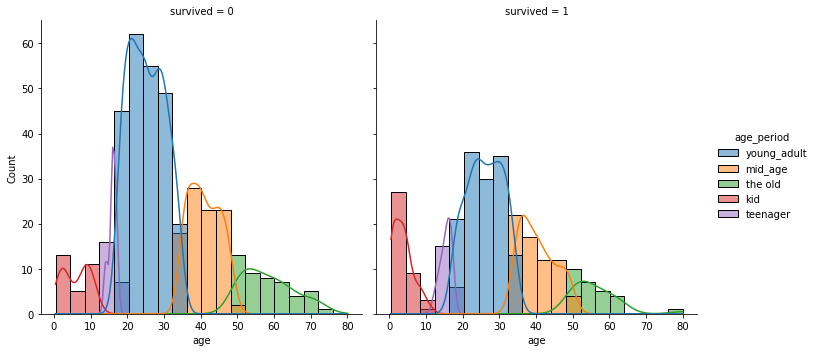

In [156]:
#按年龄段分组查看存活情况
def age_period():
    ls = []
    for age in data["age"]:
        if age < 12:
            ls.append("kid")
        elif age < 18:
            ls.append("teenager")
        elif age < 35:
            ls.append("young_adult")
        elif age < 50:
            ls.append("mid_age")
        else:
            ls.append("the old")
    return ls
data["age_period"]= age_period()
sns.displot(data, x="age", hue="age_period", kind="hist", col="survived", kde=True, alpha=.5)

# 找到研究方向

'\n由此可见，持一等票的人，主要聚集在A-E甲板；持二等票的人主要聚集在D-E甲板；持三等票的人主要聚集在E-F甲板\n'

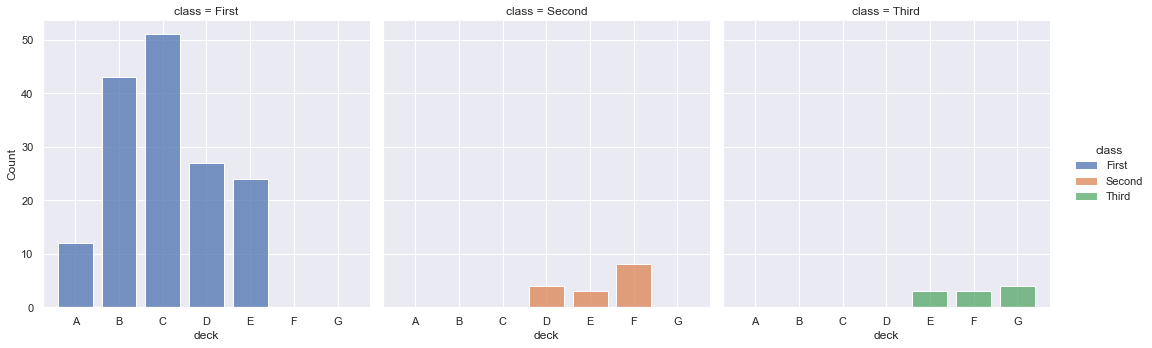

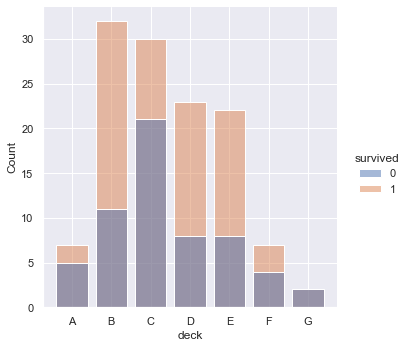

In [175]:
sns.displot(data=data.dropna(how="any"), x="deck",hue="class", shrink=.8,col="class")
sns.set_theme(style="darkgrid")
sns.displot(data=data.dropna(how="any"), x="deck", hue="survived",shrink=.8,)
"""
由此可见，持一等票的人，主要聚集在A-E甲板；持二等票的人主要聚集在D-E甲板；持三等票的人主要聚集在E-F甲板
同时就生还率而言，B、D、E甲板上的人生还率较高，接下来来研究B、D、E甲板上人的共同特征
"""

<AxesSubplot:xlabel='age_period', ylabel='Count'>

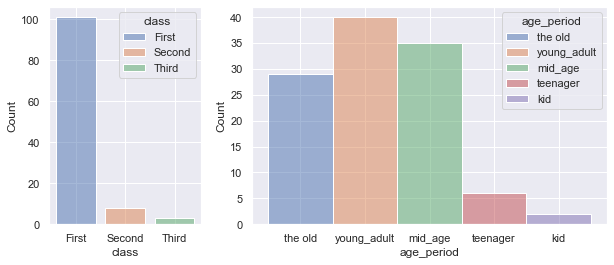

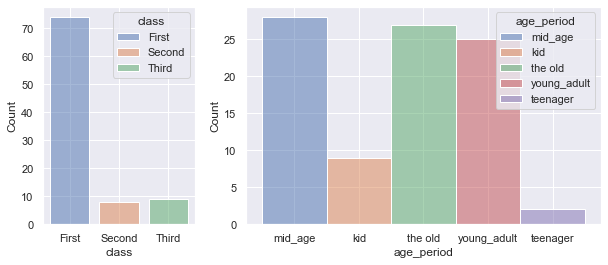

In [240]:
deck_bde = data[data["deck"].isin(["B", "D", "E"])]
deck_acfg = data[data["deck"].isin(["A", "C", "F", "G"])]
f ,axs = plt.subplots(1,2,figsize=(10,4), gridspec_kw=dict(width_ratios=[3,7]))
sns.histplot(data=deck_bde, x="class", hue="class", shrink=.8, ax=axs[0])
sns.histplot(data=deck_bde, x="age_period", hue="age_period")

g ,axs = plt.subplots(1,2,figsize=(10,4), gridspec_kw=dict(width_ratios=[3,7]))
sns.histplot(data=deck_acfg, x="class", hue="class", shrink=.8, ax=axs[0])
sns.histplot(data=deck_acfg, x="age_period", hue="age_period")

<AxesSubplot:xlabel='embark_town', ylabel='Count'>

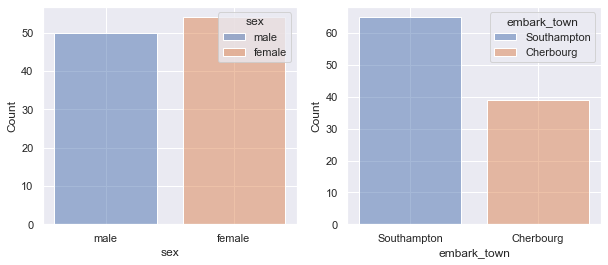

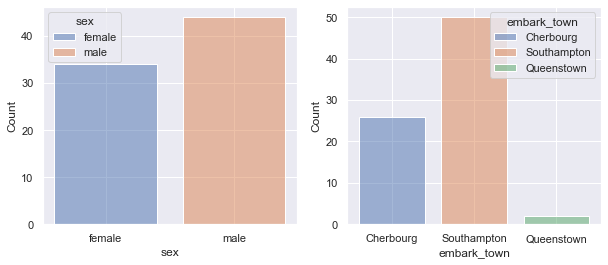

In [249]:
f ,axs = plt.subplots(1,2,figsize=(10,4), gridspec_kw=dict(width_ratios=[5,5]))
sns.histplot(data=deck_bde.dropna(how="any"), x="sex", hue="sex", shrink=.8, ax=axs[0])
sns.histplot(data=deck_bde.dropna(how="any"), x="embark_town", hue="embark_town", shrink=.8)

g ,axs = plt.subplots(1,2,figsize=(10,4), gridspec_kw=dict(width_ratios=[5,5]))
sns.histplot(data=deck_acfg.dropna(how="any"), x="sex", hue="sex", shrink=.8, ax=axs[0])
sns.histplot(data=deck_acfg.dropna(how="any"), x="embark_town", hue="embark_town", shrink=.8)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:xlabel='alone', ylabel='Count'>

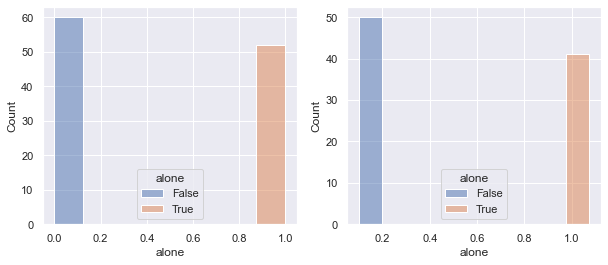

In [253]:
f ,axs = plt.subplots(1,2,figsize=(10,4), gridspec_kw=dict(width_ratios=[5,5]))
sns.histplot(data=deck_bde, x="alone", hue="alone" ,ax=axs[0])
sns.histplot(data=deck_acfg, x="alone", hue="alone", shrink=.8)